In [1]:
import pandas as pd

In [2]:
euData = pd.read_csv('data/EUBeefPricesWeekly.csv',
                    parse_dates=['Week - Begin Date'])

euData.drop(columns=['Member State Code','Week - End Date', 'Week Number', 'Unit'], inplace=True)

In [3]:
euData = euData[(euData['Member State Name'] == 'Ireland') | (euData['Member State Name'] == 'France')]
euData = euData[euData['Category'].isin(['Heifers', 'Cows', 'Steers', 'Bulls'])].reset_index(drop=True)



In [4]:
test = euData.groupby(['Member State Name', 'Category']).resample('M', on='Week - Begin Date').mean()
test.reset_index(inplace=True)
test.rename(columns={'Week - Begin Date': 'Date'}, inplace=True)
#test.set_index('Date', drop=True, inplace=True)
test.Category = test['Member State Name'] + ' ' + test['Category']
test.drop(columns='Member State Name', inplace=True)
ind = test.Date.unique()
cols = test.Category.unique()
#test.Date = test.Date.dt.strftime('%Y-%m')
test

,Category,Date,Price
0,France Bulls,2000-01-31,233.700000
1,France Bulls,2000-02-29,235.650000
2,France Bulls,2000-03-31,236.283333
3,France Bulls,2000-04-30,222.975000
4,France Bulls,2000-05-31,235.150000
...,...,...,...
2162,Ireland Steers,2022-06-30,NaN
2163,Ireland Steers,2022-07-31,437.800000
2164,Ireland Steers,2022-08-31,NaN
2165,Ireland Steers,2022-09-30,NaN


In [5]:
test2 = test.pivot_table(index='Date', columns='Category', values='Price')
test2.columns = cols
#test.index = ind
test2

,France Bulls,France Cows,France Heifers,France Steers,Ireland Bulls,Ireland Cows,Ireland Heifers,Ireland Steers
Date,,,,,,,,
2000-01-31,233.700000,231.950000,321.050000,299.325000,NaN,164.000,232.625000,249.100000
2000-02-29,235.650000,237.625000,320.125000,300.900000,NaN,171.325,238.400000,247.150000
2000-03-31,236.283333,246.150000,326.500000,302.300000,NaN,174.200,237.416667,246.416667
2000-04-30,222.975000,242.225000,318.775000,295.800000,NaN,179.050,242.400000,245.000000
2000-05-31,235.150000,263.575000,334.600000,307.300000,NaN,208.975,256.975000,262.100000
...,...,...,...,...,...,...,...,...
2021-12-31,327.200000,349.000000,428.800000,396.000000,319.280000,344.980,425.780000,422.100000
2022-01-31,352.666667,380.333333,448.666667,425.666667,353.933333,359.500,437.200000,433.066667
2022-03-31,342.000000,366.000000,440.000000,418.000000,348.700000,353.100,434.000000,430.200000


In [6]:
test2.isna().sum()

France Bulls        0
France Cows         0
France Heifers      0
France Steers       0
Ireland Bulls      31
Ireland Cows        0
Ireland Heifers     0
Ireland Steers      0
dtype: int64

<AxesSubplot:xlabel='Date'>

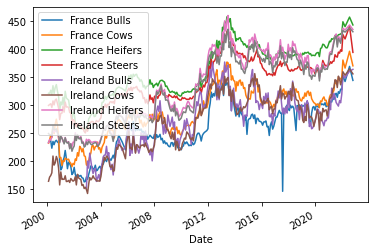

In [7]:
test2.plot()

In [46]:
df = pd.read_csv('data/FAOSTAT_data_4-29-2022.csv')
df

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,2,Afghanistan,5320,Producing Animals/Slaughtered,867,"Meat, cattle",1961,1961,Head,360000.0,F,FAO estimate
1,QCL,Crops and livestock products,2,Afghanistan,5320,Producing Animals/Slaughtered,867,"Meat, cattle",1962,1962,Head,384000.0,F,FAO estimate
2,QCL,Crops and livestock products,2,Afghanistan,5320,Producing Animals/Slaughtered,867,"Meat, cattle",1963,1963,Head,396000.0,F,FAO estimate
3,QCL,Crops and livestock products,2,Afghanistan,5320,Producing Animals/Slaughtered,867,"Meat, cattle",1964,1964,Head,402000.0,F,FAO estimate
4,QCL,Crops and livestock products,2,Afghanistan,5320,Producing Animals/Slaughtered,867,"Meat, cattle",1965,1965,Head,408000.0,F,FAO estimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42422,QCL,Crops and livestock products,181,Zimbabwe,5320,Producing Animals/Slaughtered,977,"Meat, sheep",2016,2016,Head,43166.0,Im,FAO data based on imputation methodology
42423,QCL,Crops and livestock products,181,Zimbabwe,5320,Producing Animals/Slaughtered,977,"Meat, sheep",2017,2017,Head,29918.0,Im,FAO data based on imputation methodology
42424,QCL,Crops and livestock products,181,Zimbabwe,5320,Producing Animals/Slaughtered,977,"Meat, sheep",2018,2018,Head,23767.0,Im,FAO data based on imputation methodology
42425,QCL,Crops and livestock products,181,Zimbabwe,5320,Producing Animals/Slaughtered,977,"Meat, sheep",2019,2019,Head,31884.0,Im,FAO data based on imputation methodology


In [47]:
df = df[['Area Code (FAO)','Area', 'Item', 'Year', 'Value']]

In [48]:
df.Item.unique()

array(['Meat, cattle', 'Meat, chicken', 'Meat, sheep', 'Meat, pig'],
      dtype=object)

In [59]:
test = df.pivot_table(index=['Year', 'Area','Area Code (FAO)'], columns='Item', values='Value')
test.reset_index(inplace=True)
test

Item,Year,Area,Area Code (FAO),"Meat, cattle","Meat, chicken","Meat, pig","Meat, sheep"
0,1961,Afghanistan,2,360000.0,7000.0,NaN,4336000.0
1,1961,Albania,3,88806.0,1568.0,59700.0,885776.0
2,1961,Algeria,4,200000.0,14140.0,1000.0,2300000.0
3,1961,Angola,7,133000.0,3400.0,160000.0,35000.0
4,1961,Antigua and Barbuda,8,1380.0,50.0,940.0,1500.0
...,...,...,...,...,...,...,...
11239,2020,Venezuela (Bolivarian Republic of),236,1762989.0,258563.0,1727807.0,264605.0
11240,2020,Viet Nam,237,1869043.0,618514.0,44146028.0,NaN
11241,2020,Yemen,249,1120341.0,192581.0,NaN,4509399.0
11242,2020,Zambia,251,1171342.0,49609.0,644916.0,68896.0


In [51]:
test.isna().sum()

Item
Year                  0
Area                  0
Area Code (FAO)       0
Meat, cattle        240
Meat, chicken       124
Meat, pig          1158
Meat, sheep        1079
dtype: int64

In [52]:
test.fillna(0,inplace=True)

In [53]:
test.isna().sum()

Item
Year               0
Area               0
Area Code (FAO)    0
Meat, cattle       0
Meat, chicken      0
Meat, pig          0
Meat, sheep        0
dtype: int64

In [54]:
import plotly.express as px

In [57]:
test

Item,Year,Area,Area Code (FAO),"Meat, cattle","Meat, chicken","Meat, pig","Meat, sheep"
0,1961,Afghanistan,2,360000.0,7000.0,0.0,4336000.0
1,1961,Albania,3,88806.0,1568.0,59700.0,885776.0
2,1961,Algeria,4,200000.0,14140.0,1000.0,2300000.0
3,1961,Angola,7,133000.0,3400.0,160000.0,35000.0
4,1961,Antigua and Barbuda,8,1380.0,50.0,940.0,1500.0
...,...,...,...,...,...,...,...
11239,2020,Venezuela (Bolivarian Republic of),236,1762989.0,258563.0,1727807.0,264605.0
11240,2020,Viet Nam,237,1869043.0,618514.0,44146028.0,0.0
11241,2020,Yemen,249,1120341.0,192581.0,0.0,4509399.0
11242,2020,Zambia,251,1171342.0,49609.0,644916.0,68896.0


In [56]:
fig = px.choropleth(test, locations="Area Code (FAO)",
                    color="Meat, cattle", 
                    hover_name="Area", 
                    # column to add to hover information
                    animation_frame="Year", 
                    # column on which to animate
                    color_continuous_scale=px.colors.sequential.Plasma)
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Internet usage across the world (% population)',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) 
    # by default, projection type is set to 'equirectangular'
)
fig.show()